In [285]:
from netCDF4 import Dataset
import netCDF4 as nc
import numpy as np
import fiona
import matplotlib.pyplot as plt
import numpy.ma as ma

%matplotlib inline
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

In [286]:
plik='diag_cop24_NO2_lat_long.nc'
maska='zasieg.shp'
output = 'wynik.nc'

In [287]:
def print_keys(d):
    '''Funkcja wyświetla pomocnicze klucze'''
    for k in d.keys():
        print(k,end=" ")
    print("")

In [288]:
def find_nearest_idx(array, value):
    '''Funkcja znajduje najbliższy indeks'''
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [317]:
src=Dataset(plik,"a",format="NETCDF3_CLASSIC")
vars1=src.variables
dims1=src.dimensions

In [318]:
shape=fiona.open(maska)

In [319]:
#pierwszy obiekt z pliku shp
first=next(iter(shape))

In [320]:
print_keys(vars1)
print_keys(dims1)


lon lat level level0 time AVYR H200 MX1H P998 NO2 
lon lat level level0 time 


In [321]:
NO2=np.array(vars1['NO2'][0][0])
lon=np.array(vars1['lon'])
lat=np.array(vars1['lat'])

In [322]:
wierzcholki = first['geometry']['coordinates'][0]
maskax=[]
maskay=[]

In [323]:
for i in range(len(wierzcholki)):
    lon0=find_nearest_idx(lon,wierzcholki[i][0])
    lat0=find_nearest_idx(lat,wierzcholki[i][1])
    maskax.append(lon0)
    maskay.append(lat0)

In [338]:
zm=list(vars1.keys())
del zm[0:5]

In [359]:
zm[0]

'AVYR'

In [324]:
MASKA = np.zeros_like(NO2)
MASKA.shape

(200, 280)

In [325]:
for i in range(MASKA.shape[0]):
    if(i>min(maskay) and i<max(maskay)):
        for j in range(MASKA.shape[1]):
            if(j>min(maskax) and j<max(maskax)):
                MASKA[i,j]=1


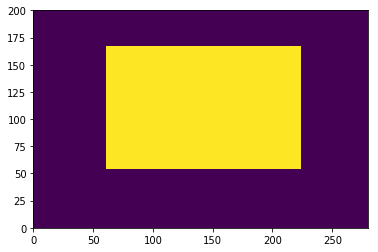

In [299]:
plt.pcolor(MASKA)

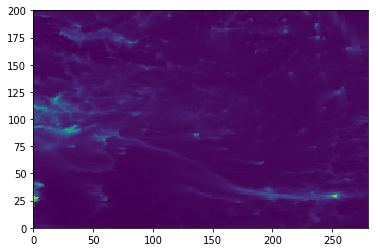

In [300]:
plt.pcolor(NO2)

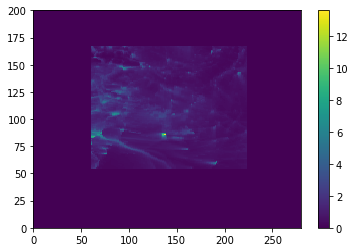

In [301]:
plt.pcolor((MASKA*NO2))
plt.colorbar()

In [354]:
trg = nc.Dataset(output, mode='w',format="NETCDF3_CLASSIC")


In [355]:
#Create dimensions
for name, dim in src.dimensions.items():
        trg.createDimension(name, len(dim) if not dim.isunlimited() else None)

In [356]:
# Copy the global attributes
trg.setncatts({a:src.getncattr(a) for a in src.ncattrs()})

In [357]:
#### Create the variables in the file
for name, var in src.variables.items():
    trg.createVariable(name, var.dtype, var.dimensions)

    # Copy the variable attributes
    trg.variables[name].setncatts({a:var.getncattr(a) for a in var.ncattrs()})

    # Copy the variables values
    if name in zm:
        tmp=np.array(src.variables[name][:])*MASKA
        tmp[tmp==0]=-999.99
        trg.variables[name][:] = ma.masked_array(tmp)
    else:
        trg.variables[name][:] = src.variables[name][:]


In [358]:
trg.close()

In [281]:
mas

NameError: name 'mas' is not defined